## Importing Libraries

In [ ]:
# For data preprocessing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# To build visualizations
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Statistical Analysis
from statsmodels.tsa.stattools import adfuller
from scipy.stats import ttest_ind

# Saving the model
import pickle

## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
holidays_events = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/holidays_events.csv')
oil = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/oil.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/sample_submission.csv')
stores = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/stores.csv')
test = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/test.csv')
transactions = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/transactions.csv')
train = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/merged_df.csv')

In [ ]:
train.dtypes

,0
id,float64
date,object
store_nbr,float64
family,object
sales,float64
onpromotion,float64
city,object
state,object
store_type,object
cluster,int64


# Questions and Hypothesis

## Hypothesis

The promotional activities, oil prices, and holidays/events have a significant impact on store sales for Corporation Favorita.

Null Hypothesis (H0): The promotional activities, oil prices, and holidays/events do not have a significant impact on store sales for Corporation Favorita.

Alternative Hypothesis (H1): The promotional activities, oil prices, and holidays/events have a significant impact on store sales for Corporation Favorita.

## Questions
1. Is the train dataset complete (has all the required dates)?
2. Which dates have the lowest and highest sales for each year?
3. Analyze the impact of the earthquake on sales
4. Determine if certain groups of stores sell more products
5. Are sales affected by promotions, oil prices and holidays?
6. What analysis can we get from the date and its extractable features?
7. Are there certain product families types that exhibit higher sales performance?
8. How does the sales trend vary across different store numbers?

## Stationarity Test

Stationarity implies that the statistical properties of the time series, such as mean and variance, remain constant over time. In this case, the ADF test was conducted on the 'sales' data from the 'merged_df' dataset. To perform the stationarity test, we will use the Augmented Dickey-Fuller (ADF) test commonly used to check for stationarity in a time series.

- Null hypothesis (H0): The sales data is non-stationary.
- Alternative hypothesis (H1): The sales data is stationary.

In [ ]:
sales_data = train['sales']

result = adfuller(sales_data)

test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f"ADF Test Statistics: {test_statistic}")
print(f"P-value: {p_value}")
print("Critical Values:")

for key, value in critical_values.items():
  print(f"   {key}: {value}")

if p_value <= 0.05:
   print("Reject the null hypothesis: The sales data is stationary.")
else:
   print("Fail to reject the null hypothesis: The sales data is non-stationary.")

Based on the ADF test, the test statistics (-36.6) is significantly lower than the critical values at all confidence levels (1%, 5%, and 10%). Additionally, the p-value is 0.0, which is lower than the significance level of 0.05.

Since the p-value is less than 0.05, we reject the null hypothesis, indicating that the sales data is stationary. The test results suggest that the sales column exhibits stationarity, which means the data has a constant mean and variance over time. This property is essential for time-series analysis and modeling, as it helps to ensure reliable forecasting and prediction of future sales trends.

### Hypothesis Testing

Null Hypothesis (H0): The promotional activities have a significant impact on store sales for Corporation Favorita.

Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales for Corporation Favorita.

In [ ]:
# Extract the relevant variables for the hypothesis test
promo_sales = train[train['onpromotion'] == 1]['sales']
non_promo_sales = train[train['onpromotion'] == 0]['sales']

# Perform a two-sample t-test to compare sales between promotional and non-promotional periods
t_statistic, p_value = ttest_ind(promo_sales, non_promo_sales)

print("Hypothesis Testing for Promotional Activities:")
print("Null Hypothesis (H0): The promotional activities do not have a significant impact on store sales.")
print("Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales.")
print("-" * 50)
print("Test Statistic:", t_statistic)
print("P-value:", p_value)
print("=" * 50)
if p_value < 0.05:
    print("Reject the null hypothesis. Promotional activities have a significant impact on store sales at Corporation Favorita.")
else:
    print("Fail to reject the null hypothesis. Promotional activities do not have a significant impact on store sales at Corporation Favorita.")


Hypothesis Testing for Promotional Activities:
Null Hypothesis (H0): The promotional activities do not have a significant impact on store sales.
Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales.
--------------------------------------------------
Test Statistic: 68.21684266478505
P-value: 0.0
Reject the null hypothesis. Promotional activities have a significant impact on store sales at Corporation Favorita.


Based on the hypothesis test, we obtained a very low p-value of 0.0. This indicates strong evidence to reject the null hypothesis. Therefore, we can conclude that promotional activities have a significant impact on store sales for Corporation Favorita. The test statistic of 68.22 also suggests a substantial difference in sales between promotional and non-promotional periods. These results support the notion that promotional activities play a crucial role in driving store sales.


### Answering Questions

#### 1. Which dates have the lowest and highest sales for each year?

In [ ]:
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year

lowest_sales_dates = train.groupby('year')['date'].min()
highest_sales_dates = train.groupby('year')['date'].max()

print("Dates with the lowest sales for each year:\n", lowest_sales_dates)
print("="*50)
print("Dates with the highest sales for each year:\n", highest_sales_dates)

Dates with the lowest sales for each year:
 year
2013   2013-01-01
2014   2014-01-01
2015   2015-01-01
2016   2016-02-08
2017   2017-01-02
Name: date, dtype: datetime64[ns]
Dates with the highest sales for each year:
 year
2013   2013-12-31
2014   2014-12-31
2015   2015-12-31
2016   2016-12-26
2017   2017-08-15
Name: date, dtype: datetime64[ns]


#### 2. Analyze the impact of the earthquake on sales

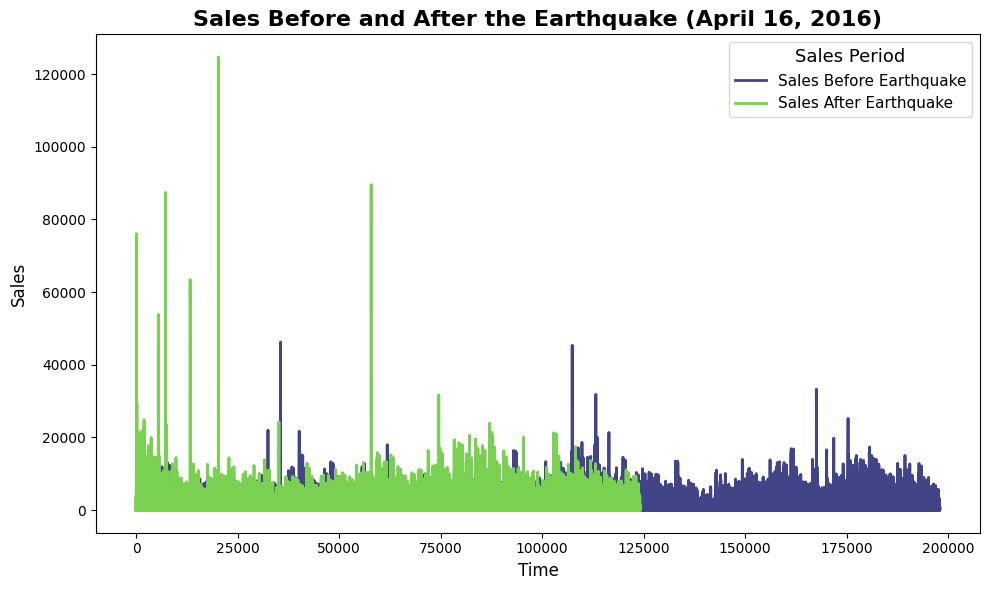

In [ ]:
earthquake_date = pd.to_datetime('2016-04-16')

# Filter the sales data before and after the earthquake
sales_before_earthquake = train[train['date'] < earthquake_date]['sales']
sales_after_earthquake = train[train['date'] > earthquake_date]['sales']

colormap = cm.get_cmap('viridis')

plt.figure(figsize=(10, 6))
plt.plot(sales_before_earthquake.values, color=colormap(0.2), label='Sales Before Earthquake', linewidth=2)
plt.plot(sales_after_earthquake.values, color=colormap(0.8), label='Sales After Earthquake', linewidth=2)

plt.xlabel('Time', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Sales Before and After the Earthquake (April 16, 2016)', fontsize=16, weight='bold')
plt.legend(title='Sales Period', title_fontsize='13', fontsize='11')

plt.tight_layout()
plt.show()

There was a surge in sales after the eathquake.

#### 3. Determine if certain groups of stores sell more products

In [ ]:
average_sales_by_cluster = train.groupby('cluster')['sales'].mean()
average_sales_by_city = train.groupby('city')['sales'].mean()
average_sales_by_state = train.groupby('state')['sales'].mean()
average_sales_by_store_type = train.groupby('store_type')['sales'].mean()
num_bars = len(average_sales_by_cluster)

colors = plt.cm.viridis(np.linspace(0, 1, num_bars))

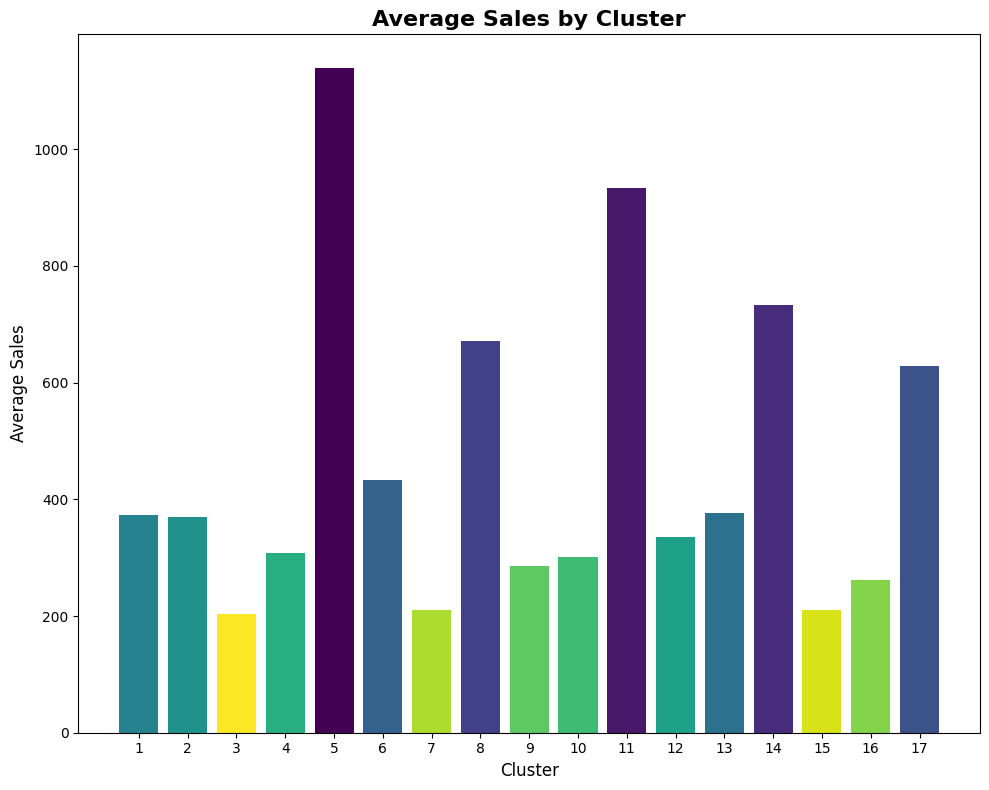

In [ ]:
average_sales_by_cluster = average_sales_by_cluster.sort_values(ascending=False)

colors = cm.viridis(np.linspace(0, 1, len(average_sales_by_cluster)))

plt.figure(figsize=(10, 8))
plt.bar(average_sales_by_cluster.index, average_sales_by_cluster.values, color=colors)

plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.title('Average Sales by Cluster', fontsize=16, weight='bold')

plt.xticks(range(1, len(average_sales_by_cluster.index) + 1))

plt.tight_layout()
plt.show()

The cluster with the highest number of stores is Cluster 5, followed by Clusters 14, 8, 11 and 12. These clusters have a significantly larger number of stores compared to the others.

#### 4. Are sales affected by promotions, oil prices and holidays?

In [ ]:
# Calculate correlations between sales and promotions, oil prices, holidays
corr_sales_promotions = train['sales'].corr(train['onpromotion'])
corr_sales_oil = train['sales'].corr(train['dcoilwtico'])
corr_sales_holidays = train['sales'].corr(train['holiday_type'] == 'Holiday')

# Print the correlation values
print(f"Correlation between Sales and Promotions: {corr_sales_promotions}")
print(f"Correlation between Sales and Oil Prices: {corr_sales_oil}")
print(f"Correlation between Sales and Holidays: {corr_sales_holidays}")

Correlation between Sales and Promotions: 0.41802891972423867
Correlation between Sales and Oil Prices: -0.06150915237080955
Correlation between Sales and Holidays: -0.037068929302516415


- Promotions:
There is a positive correlation of approximately 0.42 between sales and promotions. This suggests that promotions have a moderate positive impact on sales. When promotions are running, there is an increased likelihood of higher sales.


- Oil Prices:
There is a weak negative correlation of approximately -0.06 between sales and oil prices. This indicates that there is a slight negative relationship between sales and oil prices. However, the correlation is close to zero, suggesting that oil prices have minimal impact on sales.


- Holidays:
There is a very weak negative correlation of approximately -0.04 between sales and holidays. This indicates that there is almost no relationship between sales and holidays. Holidays do not seem to have a significant impact on sales.
These insights suggest that promotions have a relatively stronger influence on sales compared to oil prices and holidays. While promotions positively impact sales, oil prices and holidays show minimal or no relationship with sales.

#### 5. What analysis can we get from the date and its extractable features?

In [ ]:
merged_df_copy = train.copy()

# Extracting Date Components
merged_df_copy['date'] = pd.to_datetime(merged_df_copy['date'])
merged_df_copy['year'] = merged_df_copy['date'].dt.year
merged_df_copy['month'] = merged_df_copy['date'].dt.month
merged_df_copy['day'] = merged_df_copy['date'].dt.day
merged_df_copy.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,year,month,day
0,581.0,2013-01-01,25.0,LAWN AND GARDEN,2.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,2013,1,1
1,580.0,2013-01-01,25.0,LADIESWEAR,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,2013,1,1
2,579.0,2013-01-01,25.0,HOME CARE,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,2013,1,1
3,578.0,2013-01-01,25.0,HOME APPLIANCES,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,2013,1,1
4,577.0,2013-01-01,25.0,HOME AND KITCHEN II,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,2013,1,1


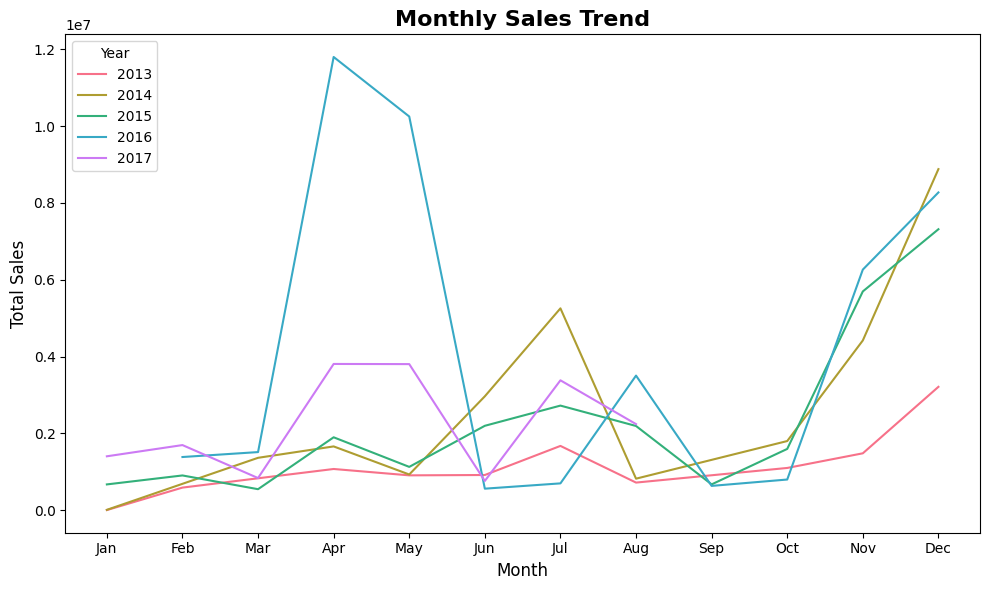

In [ ]:
colors = sns.color_palette("husl", n_colors=len(merged_df_copy['year'].unique()))
monthly_sales = merged_df_copy.groupby(['year', 'month'])['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', palette=colors)

plt.title('Monthly Sales Trend', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Year', fontsize=10)

plt.tight_layout()
plt.show()

The line plot depicting the monthly sales trend shows variations in sales throughout the year.
Sales seem to dip during the middle months of the year (July to September) before rising again in the last quarter (October to December), with the highest sales in December.
The year-wise color distinction helps to observe sales patterns for each year.

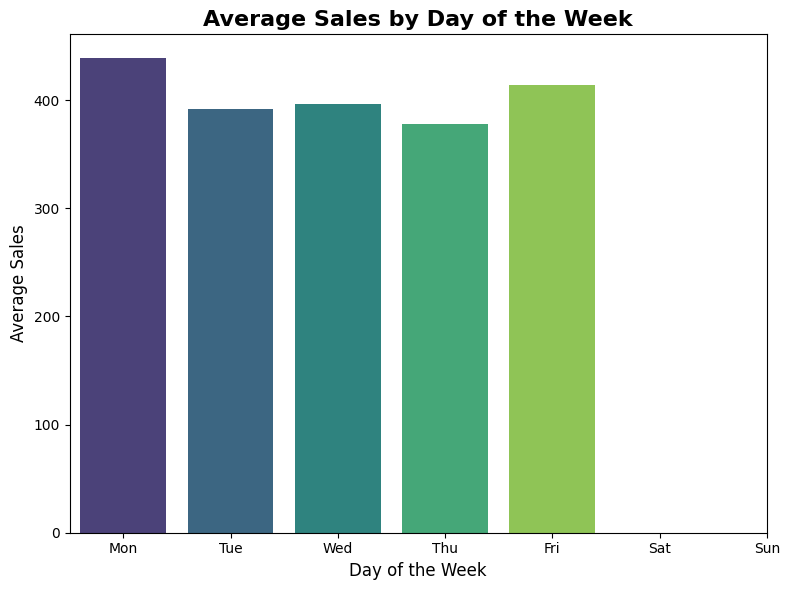

In [ ]:
merged_df_copy['day_of_week'] = merged_df_copy['date'].dt.dayofweek

day_of_week_sales = merged_df_copy.groupby('day_of_week')['sales'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=day_of_week_sales, x='day_of_week', y='sales', palette='viridis')

plt.title('Average Sales by Day of the Week', fontsize=16, weight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

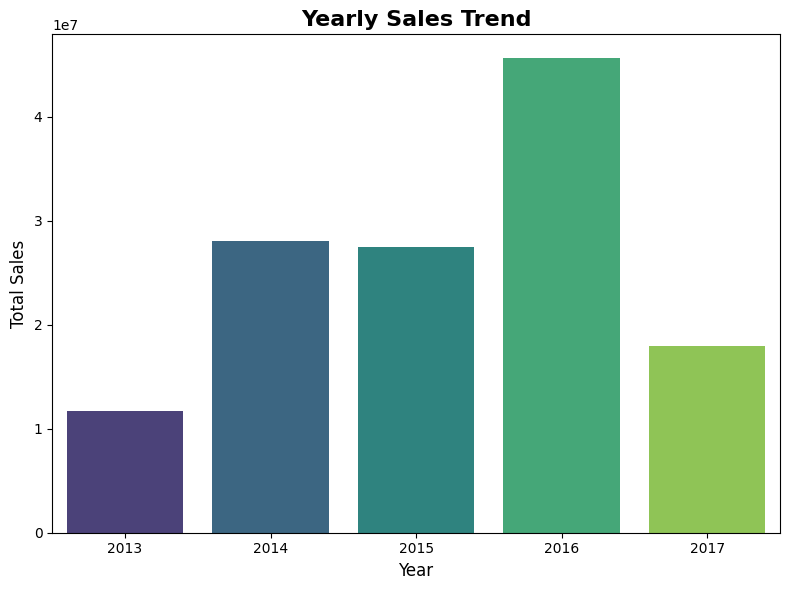

In [ ]:
yearly_sales = merged_df_copy.groupby('year')['sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=yearly_sales, x='year', y='sales', palette='viridis')

plt.title('Yearly Sales Trend', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.tight_layout()
plt.show()

From the date column, we can extract components such as the year, month and day. From these, we can examine daily, monthly and annual sale trends. We can also examine and establish whether specific days such as holidays have higher sales compared to others.

#### 6. Are there certain product families types that exhibit higher sales performance?

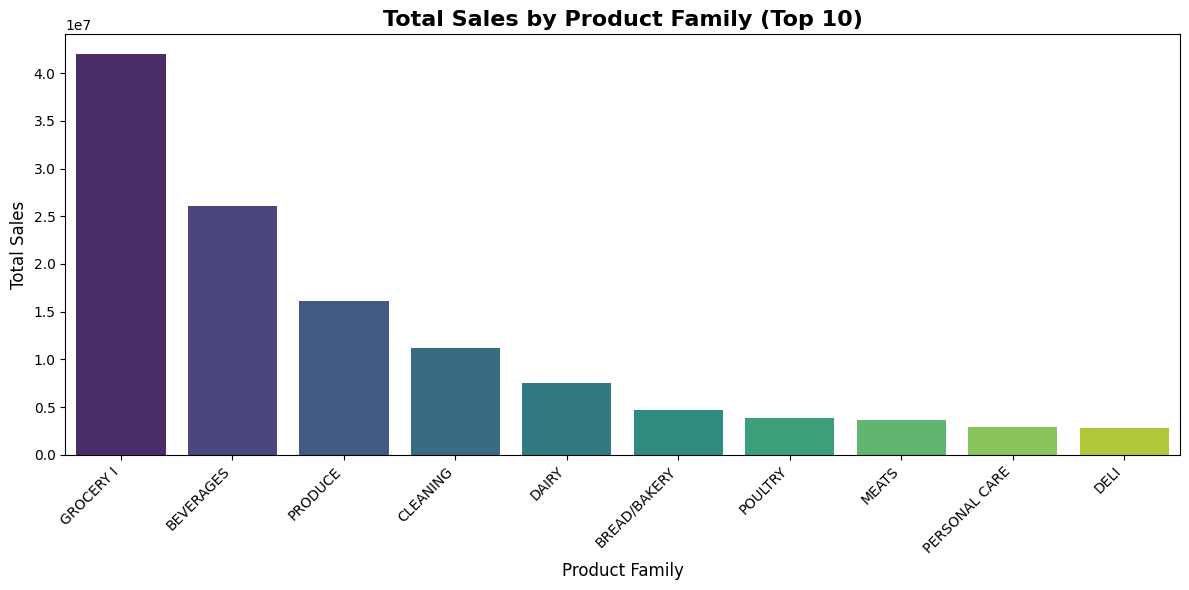

In [ ]:
family_sales =train.groupby('family')['sales'].sum().sort_values(ascending=False)

top_10_families = family_sales.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_families.index, y=top_10_families.values, palette='viridis')

plt.title('Total Sales by Product Family (Top 10)', fontsize=16, weight='bold')
plt.xlabel('Product Family', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The graph illustrates the sales performance of the top 10 product families. Grocery I and beverages exhibit the highest sales, indicating their popularity among customers. Produce and cleaning products also demonstrate significant sales, reflecting the importance of fresh produce and household cleaning supplies. Dairy, bread/bakery, poultry, and meats contribute to overall sales, suggesting the demand for essential food items. Personal care and deli products have relatively lower sales but still play a role in the product mix.

#### 7. How does the sales trend vary across different store numbers?

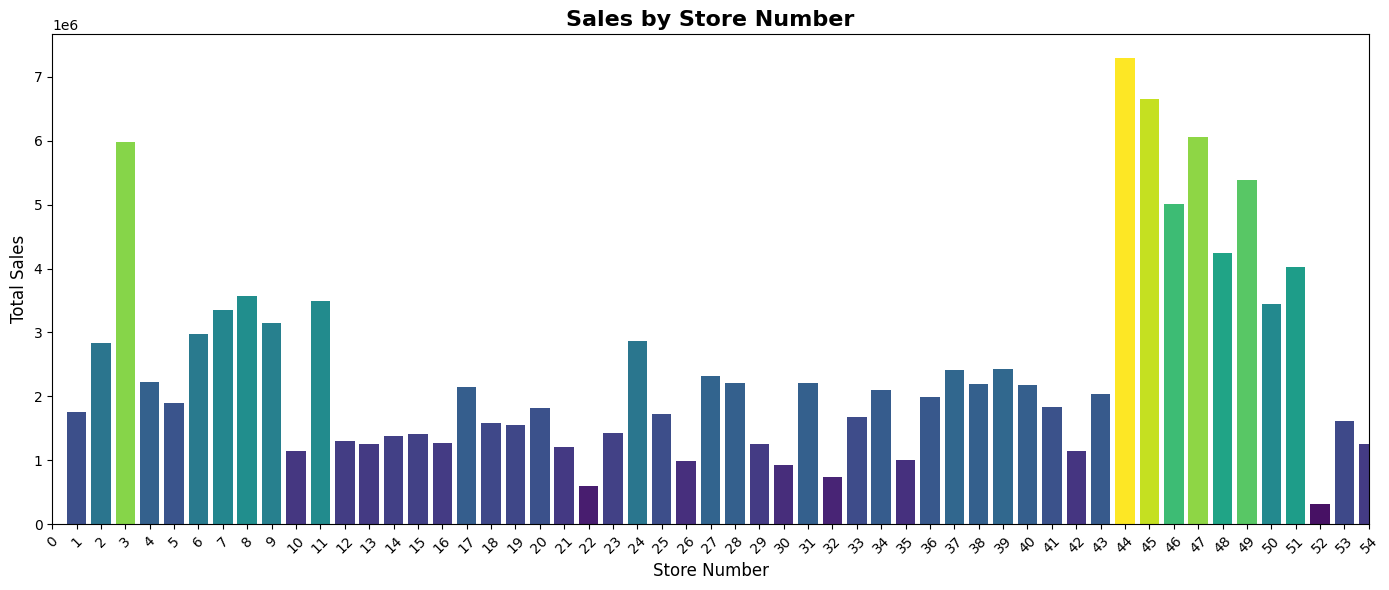

In [ ]:
store_sales = train.groupby('store_nbr')['sales'].sum()

plt.figure(figsize=(14, 6))
plt.bar(store_sales.index, store_sales.values, color=cm.viridis(store_sales.values / max(store_sales.values)))

plt.xlabel('Store Number', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Sales by Store Number', fontsize=16, weight='bold')

plt.xlim(0, 54)
plt.xticks(range(55), rotation=45)

plt.tight_layout()
plt.show()

Different store numbers exhibit different patterns in sales. Some store numbers have higher sales while others have lower cells.

In [ ]:
test = test.merge(stores, how="left", on='store_nbr')
test = test.merge(oil, how="left", on='date')
test = test.merge(transactions, how="left", on=['date','store_nbr'])
test = test.merge(holidays_events,on='date',how='left')
test = test.rename(columns={'type_x' : 'store_type','type_y':'holiday_type'})

In [ ]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,store_type,cluster,dcoilwtico,transactions,holiday_type,locale,locale_name,description,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
onpromotion,0
city,0
state,0
store_type,0
cluster,0
dcoilwtico,7128


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            28512 non-null  int64  
 1   date          28512 non-null  object 
 2   store_nbr     28512 non-null  int64  
 3   family        28512 non-null  object 
 4   onpromotion   28512 non-null  int64  
 5   city          28512 non-null  object 
 6   state         28512 non-null  object 
 7   store_type    28512 non-null  object 
 8   cluster       28512 non-null  int64  
 9   dcoilwtico    21384 non-null  float64
 10  transactions  0 non-null      float64
 11  holiday_type  1782 non-null   object 
 12  locale        1782 non-null   object 
 13  locale_name   1782 non-null   object 
 14  description   1782 non-null   object 
 15  transferred   1782 non-null   object 
dtypes: float64(2), int64(4), object(10)
memory usage: 3.5+ MB


In [ ]:
duplicate_count_test = test.duplicated().sum()
print(f"Number of duplicated records in Test: {duplicate_count_test}")

Number of duplicated records in Test: 0


In [ ]:
train['date'] = pd.to_datetime(train['date'])

In [ ]:
test['date'] = pd.to_datetime(test['date'])

## Handling Missing Values

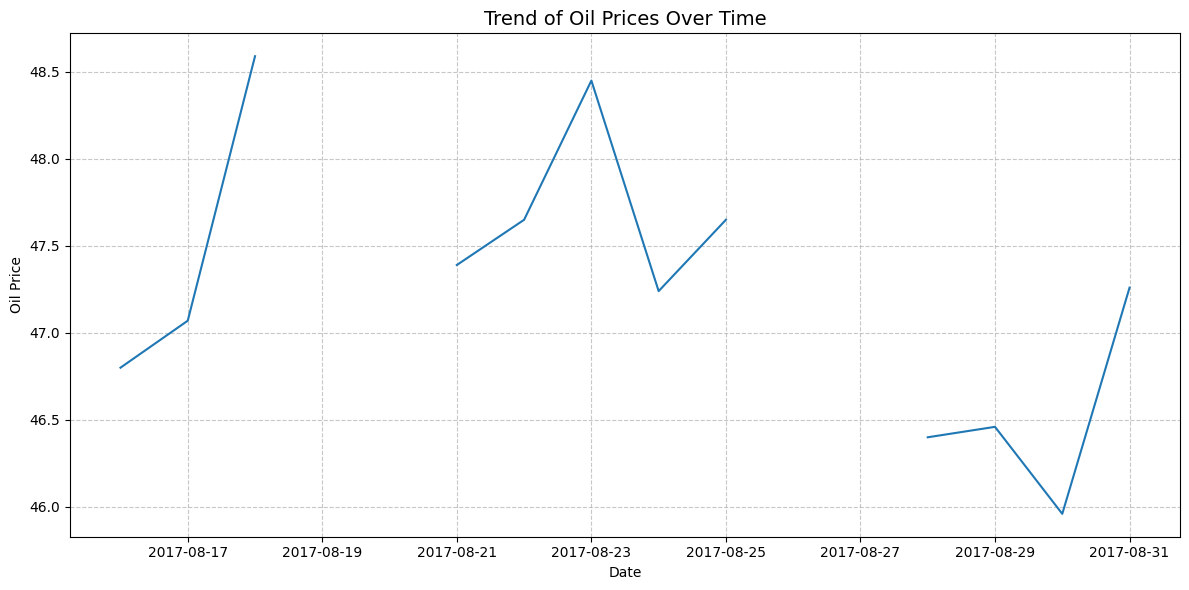

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test['date'], test['dcoilwtico'])

ax.set_title('Trend of Oil Prices Over Time', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Oil Price')

ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [ ]:
test['dcoilwtico'] = test['dcoilwtico'].fillna(method='backfill')

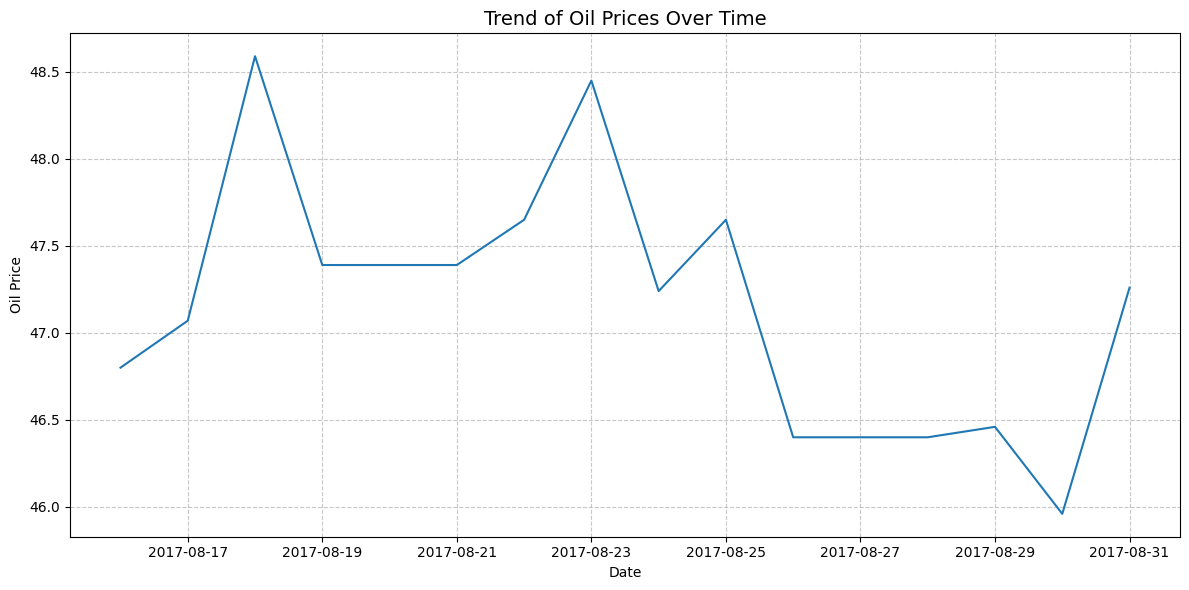

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test['date'], test['dcoilwtico'])

ax.set_title('Trend of Oil Prices Over Time', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Oil Price')

ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [ ]:
test.transactions = test.transactions.replace(np.nan,0)

In [ ]:
test[['locale','locale_name', 'description']] = test[['locale','locale_name', 'description']].replace(np.nan,'')
test['holiday_type'] = test['holiday_type'].replace(np.nan,'Work Day')
test['transferred'] = test['transferred'].replace(np.nan,False)

In [ ]:
test.isna().sum()

,0
id,0
date,0
store_nbr,0
family,0
onpromotion,0
city,0
state,0
store_type,0
cluster,0
dcoilwtico,0


In [ ]:
dataTestFilled = test.copy()
try:
    dataTestFilled.insert(3,'sales',-1)
except:
    pass;

dataTestFilled

,id,date,store_nbr,sales,family,onpromotion,city,state,store_type,cluster,dcoilwtico,transactions,holiday_type,locale,locale_name,description,transferred
0,3000888,2017-08-16,1,-1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.80,0.0,Work Day,,,,False
1,3000889,2017-08-16,1,-1,BABY CARE,0,Quito,Pichincha,D,13,46.80,0.0,Work Day,,,,False
2,3000890,2017-08-16,1,-1,BEAUTY,2,Quito,Pichincha,D,13,46.80,0.0,Work Day,,,,False
3,3000891,2017-08-16,1,-1,BEVERAGES,20,Quito,Pichincha,D,13,46.80,0.0,Work Day,,,,False
4,3000892,2017-08-16,1,-1,BOOKS,0,Quito,Pichincha,D,13,46.80,0.0,Work Day,,,,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,-1,POULTRY,1,Quito,Pichincha,B,6,47.26,0.0,Work Day,,,,False
28508,3029396,2017-08-31,9,-1,PREPARED FOODS,0,Quito,Pichincha,B,6,47.26,0.0,Work Day,,,,False
28509,3029397,2017-08-31,9,-1,PRODUCE,1,Quito,Pichincha,B,6,47.26,0.0,Work Day,,,,False
28510,3029398,2017-08-31,9,-1,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6,47.26,0.0,Work Day,,,,False


In [ ]:
train = pd.concat([train,dataTestFilled])

In [ ]:
train.shape

(350559, 18)

In [ ]:
train.isna().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
city,0
state,0
store_type,0
cluster,0


## Feature Engineering

### 1. Seasonality Patterns

These help the model understand time-based variation in demand:

In [ ]:
# Time features
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['week'] = train['date'].dt.isocalendar().week.astype(int)
train['year'] = train['date'].dt.year
train['day_of_week'] = train['date'].dt.dayofweek
train['is_weekend'] = (train['day_of_week'] >= 5).astype('uint8')
train['quarter'] = train['date'].dt.quarter
train['season'] = train['month'].apply(lambda x: 0 if x in [2,3] else 1 if x in [4,5,6] else 2 if x in [7,8] else 3 if x in [9,10,11] else 4)

In [ ]:
#Created a new feature, the length of the day leading to thanksgiving and christmas on train data
train['Days_to_Thanksgiving'] = (pd.to_datetime(train["year"].astype(str)+"-11-24", format="%Y-%m-%d") - pd.to_datetime(train["date"], format="%Y-%m-%d")).dt.days.astype(int)
train['Days_to_Christmas'] = (pd.to_datetime(train["year"].astype(str)+"-12-24", format="%Y-%m-%d") - pd.to_datetime(train["date"], format="%Y-%m-%d")).dt.days.astype(int)

### 2. External Economic Indicators
These account for macro-level factors that influence demand:

- **oil_price**: Proxy for economic health/inflation, which affects consumer spending.
- **is_holiday**, **holiday_type**: Holidays and events often lead to demand spikes.

In [ ]:
train['is_holiday'] = (train['holiday_type'] != 'Work Day').astype('uint8')

In [ ]:
train['is_holiday'].value_counts()

,count
is_holiday,
1,323829
0,26730


In [ ]:
train['holiday_type'].value_counts()

,count
holiday_type,
Holiday,204600
Event,59235
Additional,41415
Work Day,26730
Transfer,13695
Bridge,4884


### 3. Internal Business Factors
These are directly influenced by the retailer’s operations and strategy:

- **onpromotion**: Indicates whether an item is under promotion, often driving short-term sales increases.

In [ ]:
train['onpromotion'] = train['onpromotion'].apply(lambda x: 1 if x != 0 else 0)

In [ ]:
train['onpromotion'].value_counts()

,count
onpromotion,
0,254539
1,96020


Assign approximate base prices to each product family using a predefined mapping.
Then, simulate realistic daily price fluctuations by applying ±10% random noise.
This helps generate a dynamic 'price' feature for each item on each day.

In [ ]:
family_price_mapping = {
    'AUTOMOTIVE': 100.0,
    'BABY CARE': 25.0,
    'BEAUTY': 18.0,
    'BEVERAGES': 8.0,
    'BOOKS': 12.0,
    'BREAD/BAKERY': 4.0,
    'CELEBRATION': 20.0,
    'CLEANING': 10.0,
    'DAIRY': 6.0,
    'DELI': 9.0,
    'EGGS': 3.5,
    'FROZEN FOODS': 7.0,
    'GROCERY I': 5.0,
    'GROCERY II': 4.5,
    'HARDWARE': 45.0,
    'HOME AND KITCHEN I': 35.0,
    'HOME AND KITCHEN II': 30.0,
    'HOME APPLIANCES': 150.0,
    'HOME CARE': 15.0,
    'LADIESWEAR': 28.0,
    'LAWN AND GARDEN': 40.0,
    'LINGERIE': 22.0,
    'LIQUOR,WINE,BEER': 18.0,
    'MAGAZINES': 5.0,
    'MEATS': 10.0,
    'PERSONAL CARE': 14.0,
    'PET SUPPLIES': 17.0,
    'PLAYERS AND ELECTRONICS': 200.0,
    'POULTRY': 8.0,
    'PREPARED FOODS': 9.0,
    'PRODUCE': 5.0,
    'SCHOOL AND OFFICE SUPPLIES': 10.0,
    'SEAFOOD': 20.0
}

train['base_price'] = train['family'].map(family_price_mapping)

# Simulate time-varying prices with ±10% random daily noise
np.random.seed(42)
train['daily_variation'] = np.random.uniform(0.9, 1.1, size=len(train))

train['price'] = (train['base_price'] * train['daily_variation']).round(2)

In [ ]:
# Log value of sales to avoid negative predicted sales value and skewness
train['log_sales'] = np.log(train['sales']+1)

In [ ]:
# Lag Features for Log Sales
train['lag_1_log_sales'] = train.groupby('store_nbr')['log_sales'].shift(1)
train['lag_7_log_sales'] = train.groupby('store_nbr')['log_sales'].shift(7)
train['lag_14_log_sales'] = train.groupby('store_nbr')['log_sales'].shift(14)

# Lag for Promotions
train['lag_promo_1'] = train.groupby('store_nbr')['onpromotion'].shift(1)
train['rolling_promo_7'] = train.groupby('store_nbr')['onpromotion'].shift(1).rolling(7).median()

# Rolling Median Log Sales
train['rolling_7_log_sales'] = train.groupby('store_nbr')['log_sales'].shift(1).rolling(window=7).median()
train['rolling_14_log_sales'] = train.groupby('store_nbr')['log_sales'].shift(1).rolling(window=14).median()

In [ ]:
train.isna().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
city,0
state,0
store_type,0
cluster,0


In [ ]:
train = train.dropna(subset=[
    'lag_1_log_sales', 'lag_7_log_sales', 'lag_14_log_sales',
    'lag_promo_1', 'rolling_promo_7',
    'rolling_7_log_sales', 'rolling_14_log_sales'
])

In [ ]:
train.shape

(321200, 39)

### Dropping Unneccessary Columns as it is not needed for our analysis

In [ ]:
columns_to_drop = ['date','id', 'locale', 'locale_name', 'description', 'transferred', 'state','base_price','daily_variation','transactions']
train = train.drop(columns=columns_to_drop)

### Encoding Categorical Variables

In [ ]:
train.head()

,store_nbr,family,sales,onpromotion,city,store_type,cluster,holiday_type,dcoilwtico,year,...,is_holiday,price,log_sales,lag_1_log_sales,lag_7_log_sales,lag_14_log_sales,lag_promo_1,rolling_promo_7,rolling_7_log_sales,rolling_14_log_sales
14,25.0,CELEBRATION,0.000,0,Salinas,D,1,Holiday,93.14,2013,...,1,18.73,0.000000,5.231109,2.772589,1.098612,0.0,0.0,3.850148,1.445186
15,25.0,BREAD/BAKERY,180.589,0,Salinas,D,1,Holiday,93.14,2013,...,1,3.75,5.201746,0.000000,6.552508,0.000000,0.0,0.0,3.850148,0.895880
16,25.0,BOOKS,0.000,0,Salinas,D,1,Holiday,93.14,2013,...,1,11.53,0.000000,5.201746,3.422796,0.000000,0.0,0.0,3.850148,2.282174
17,25.0,BEVERAGES,810.000,0,Salinas,D,1,Holiday,93.14,2013,...,1,8.04,6.698268,0.000000,3.850148,0.000000,0.0,0.0,3.850148,2.282174
18,25.0,BEAUTY,2.000,0,Salinas,D,1,Holiday,93.14,2013,...,1,17.76,1.098612,6.698268,1.791759,0.000000,0.0,0.0,4.277915,3.097692


In [ ]:
pip install category_encoders

In [ ]:
from category_encoders import BinaryEncoder

# Define the categorical columns
categorical_columns = ["family", "city", "holiday_type", "store_type"]

binary_encoder = BinaryEncoder(cols=categorical_columns)

train_encoded = binary_encoder.fit_transform(train[categorical_columns])

train = pd.concat([train, train_encoded], axis=1)

train.head()

,store_nbr,family,sales,onpromotion,city,store_type,cluster,holiday_type,dcoilwtico,year,...,city_1,city_2,city_3,city_4,holiday_type_0,holiday_type_1,holiday_type_2,store_type_0,store_type_1,store_type_2
14,25.0,CELEBRATION,0.000,0,Salinas,D,1,Holiday,93.14,2013,...,0,0,0,1,0,0,1,0,0,1
15,25.0,BREAD/BAKERY,180.589,0,Salinas,D,1,Holiday,93.14,2013,...,0,0,0,1,0,0,1,0,0,1
16,25.0,BOOKS,0.000,0,Salinas,D,1,Holiday,93.14,2013,...,0,0,0,1,0,0,1,0,0,1
17,25.0,BEVERAGES,810.000,0,Salinas,D,1,Holiday,93.14,2013,...,0,0,0,1,0,0,1,0,0,1
18,25.0,BEAUTY,2.000,0,Salinas,D,1,Holiday,93.14,2013,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
# Recreate the transformation for only 'family'
family_encoded = binary_encoder.transform(train[categorical_columns])[[
    col for col in binary_encoder.get_feature_names_out() if 'family_' in col
]]
family_encoded['family'] = train['family'].values  # Add back original label

# Drop duplicates to see each unique encoding
family_mapping_df = family_encoded.drop_duplicates().reset_index(drop=True)

print(family_mapping_df)

    family_0  family_1  family_2  family_3  family_4  family_5  \
0          0         0         0         0         0         1   
1          0         0         0         0         1         0   
2          0         0         0         0         1         1   
3          0         0         0         1         0         0   
4          0         0         0         1         0         1   
5          0         0         0         1         1         0   
6          0         0         0         1         1         1   
7          0         0         1         0         0         0   
8          0         0         1         0         0         1   
9          0         0         1         0         1         0   
10         0         0         1         0         1         1   
11         0         0         1         1         0         0   
12         0         0         1         1         0         1   
13         0         0         1         1         1         0   
14        

# For Developing the Streamlit app

In [ ]:
train_copy = train.copy()

binary_family_cols = [f'family_{i}' for i in range(6)]

binary_to_family = {}

for _, row in train_copy[binary_family_cols + ['family']].drop_duplicates().iterrows():
    binary_key = ''.join(str(int(row[col])) for col in binary_family_cols)
    binary_to_family[binary_key] = row['family']

def decode_family(row):
    binary_key = ''.join(str(int(row[col])) for col in binary_family_cols)
    return binary_to_family.get(binary_key, 'UNKNOWN')

train_copy['item_family'] = train.apply(decode_family, axis=1)

print(train_copy[['item_family', 'family']].drop_duplicates().sort_values(by='item_family'))

train_copy['date'] = pd.to_datetime(train[['year', 'month', 'day']])

required_columns = [
    'item_family', 'date', 'price', 'store_nbr', 'is_holiday', 'cluster', 'sales',
    'onpromotion', 'dcoilwtico', 'day', 'month', 'week', 'year', 'day_of_week',
    'is_weekend', 'quarter', 'season', 'Days_to_Thanksgiving', 'Days_to_Christmas',
    'log_sales', 'lag_1_log_sales', 'lag_7_log_sales', 'lag_14_log_sales', 'lag_promo_1',
    'rolling_promo_7', 'rolling_7_log_sales', 'rolling_14_log_sales', 'city_0', 'city_1',
    'city_2', 'city_3', 'city_4', 'holiday_type_0', 'holiday_type_1', 'holiday_type_2',
    'store_type_0', 'store_type_1', 'store_type_2'
]

train_copy[required_columns].to_csv("DF_cleaned_data.csv", index=False)

                    item_family                      family
20                   AUTOMOTIVE                  AUTOMOTIVE
19                    BABY CARE                   BABY CARE
18                       BEAUTY                      BEAUTY
17                    BEVERAGES                   BEVERAGES
16                        BOOKS                       BOOKS
15                 BREAD/BAKERY                BREAD/BAKERY
14                  CELEBRATION                 CELEBRATION
89                     CLEANING                    CLEANING
21                        DAIRY                       DAIRY
87                         DELI                        DELI
86                         EGGS                        EGGS
85                 FROZEN FOODS                FROZEN FOODS
84                    GROCERY I                   GROCERY I
83                   GROCERY II                  GROCERY II
183                    HARDWARE                    HARDWARE
80           HOME AND KITCHEN I         

# Saving the Binary encoder and Merged Dataframe

In [ ]:
train = train.drop(columns=categorical_columns)

In [ ]:
train.columns

Index(['store_nbr', 'sales', 'onpromotion', 'cluster', 'dcoilwtico', 'year',
       'day', 'month', 'week', 'day_of_week', 'is_weekend', 'quarter',
       'season', 'Days_to_Thanksgiving', 'Days_to_Christmas', 'is_holiday',
       'price', 'log_sales', 'lag_1_log_sales', 'lag_7_log_sales',
       'lag_14_log_sales', 'lag_promo_1', 'rolling_promo_7',
       'rolling_7_log_sales', 'rolling_14_log_sales', 'family_0', 'family_1',
       'family_2', 'family_3', 'family_4', 'family_5', 'city_0', 'city_1',
       'city_2', 'city_3', 'city_4', 'holiday_type_0', 'holiday_type_1',
       'holiday_type_2', 'store_type_0', 'store_type_1', 'store_type_2'],
      dtype='object')

In [ ]:
train.to_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/train_final.csv', index=False)

In [ ]:
with open('/content/drive/MyDrive/favorita-grocery-sales-forecasting/binary_encoder.pkl', 'wb') as f:
    pickle.dump(binary_encoder, f)